# Healthcare Analytics Case Study

## Objective

Develop an effective machine learning model from the Heart Disease UCI dataset that is capable of accurately classifying patients with heart disease, and holds significant potential for both healthcare organizations and patients.

## Pre-Requisites
- Python Environment: You should have a Python environment set up on your system. If you don't have Python installed, you can download it from the [official Python website](https://www.python.org/downloads/). We recommend downloading Python 3.8 or above.
- Jupyter Notebook: This code is intended to be run in a Jupyter Notebook environment. Make sure you have [Jupyter Notebook installed](https://jupyter.org/install).
- Library Installation: You need to install the required libraries:
    - pandas
    - numpy
    - matplotlib
    - seaborn
    - scikit-learn
    - ucimlrepo : A repository of datasets from where we will load our data. 

To install, run the following commands:
"**!pip3 install pandas numpy matplotlib seaborn scikit-learn ucimlrepo**"

In [3]:
# Install the required libraries
!pip3 install pandas numpy matplotlib seaborn scikit-learn ucimlrepo

  Obtaining dependency information for ucimlrepo from https://files.pythonhosted.org/packages/3e/4a/ecc3456479d687202b34ee42317c3a63e09793c9409a720052d38356431a/ucimlrepo-0.0.3-py3-none-any.whl.metadata

[notice] A new release of pip is available: 23.2.1 -> 23.3
[notice] To update, run: python3.11 -m pip install --upgrade pip


### Business Use Case

In essence, healthcare analytics empowers healthcare organizations to provide better care, save costs, and make data-driven decisions that benefit both patients and providers.

We will develop an effective machine learning model from the Heart Disease UCI dataset that is capable of accurately classifying patients with heart disease and holds significant potential for both healthcare organizations and patients.

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

### Load the dataset

We'll use the Heart Disease UCI dataset that contains 13 attributes and the target is the class variable affected by other columns:

- **Age**: Age of the individual.
- **Sex**: Gender of the individual (0 = female, 1 = male).
- **CP (Chest Pain Type)**: A categorical variable indicating the type of chest pain experienced by the individual (values 0, 1, 2, 3).
- **Trestbps (Resting Blood Pressure)**: The resting blood pressure of the individual.
- **Chol (Serum Cholesterol)**: Serum cholesterol level.
- **FBS (Fasting Blood Sugar)**: A binary variable indicating whether fasting blood sugar is greater than 120 mg/dl (1 = true, 0 = false).
- **RestECG (Resting Electrocardiographic Results)**: A categorical variable representing the resting electrocardiographic results (values 0, 1, 2).
- **Thalach (Maximum Heart Rate Achieved)**: The maximum heart rate achieved by the individual.
- **Exang (Exercise-Induced Angina)**: A binary variable indicating whether exercise-induced angina (1 = yes, 0 = no).
- **Oldpeak**: ST depression induced by exercise relative to rest.
- **Slope**: The slope of the peak exercise ST segment (values 0, 1, 2).
- **CA (Number of Major Vessels Colored by Fluoroscopy)**: The number of major vessels (0-3) colored by fluoroscopy.
- **Thal (Thalassemia)**: A categorical variable indicating the presence of thalassemia (values 0, 1, 2, 3).
- **Target**: The presence of heart disease (0 = no heart disease, 1 = heart disease).

In [25]:
healthcare_data = pd.read_csv('./heart.csv')

### Data Exploration
After we load the dataset, we will try to get a sense of our data. One way to do that is by looking at its structure.

In [37]:
healthcare_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [35]:
# Descriptive statistics
healthcare_data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In the code above, we: 
- The **data.head()** function is used to display the first few rows of the dataset. This enables us to view the column names and their corresponding values.
- **The data.describe()** function is used to generate summary statistics of the dataset:
    - The **count** column indicates the number of valid, non-missing data points in each column. In this case, it shows that there are 1,025 data points for all columns. 
    - The **mean** shows us that the average age of patients in the dataset is 54 years old where approximately 70% are male, the various health-related metrics of patients upon admission, like their resting blood pressure (trestbps), and the target value which is >50% corresponding to the value(1) indicating the presence of heart disease among most patients.
    - The **std** tells us the distribution of data values. We learn that most target values (>50%) are closer to the mean, indicating that most patients have heart disease.
    - The **min** values indicate that the youngest patient is 29 years old. Since age and the target value is a binary variable (values 0 and 1), the min value is 0 but are not inherently meaningful
    - The **25%** represents a quarter of our dataset. This indicates that at least a quarter of the dataset is females. Also, the age column indicates that 25% of our patients are below or equal to 48 years old. Furthermore, we learned that at least a quarter of the patients on this dataset do not have heart disease. Similarly, we can break down the logic for 50% and 75% quartiles.
    -  The **max** value indicates that the oldest patient in our dataset is 77 years old. Since age and the target value is a binary variable (values 0 and 1), the max value is 1 but are not inherently meaningful.


### Data Preprocessing
After exploring our data, we will check for missing values and encode categorical variables (if any).

In [39]:
# Check for missing values
healthcare_data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

- We check for missing values using is.null() and .sum() fetches the the total number of missing values for each attribute.
- We find that there are no missing values in our dataset.

### Data Visualization:

Now, we will visualize:

- Age Distribution for Heart Disease
- Correlation Heatmap

#### Age Distribution for Heart Disease

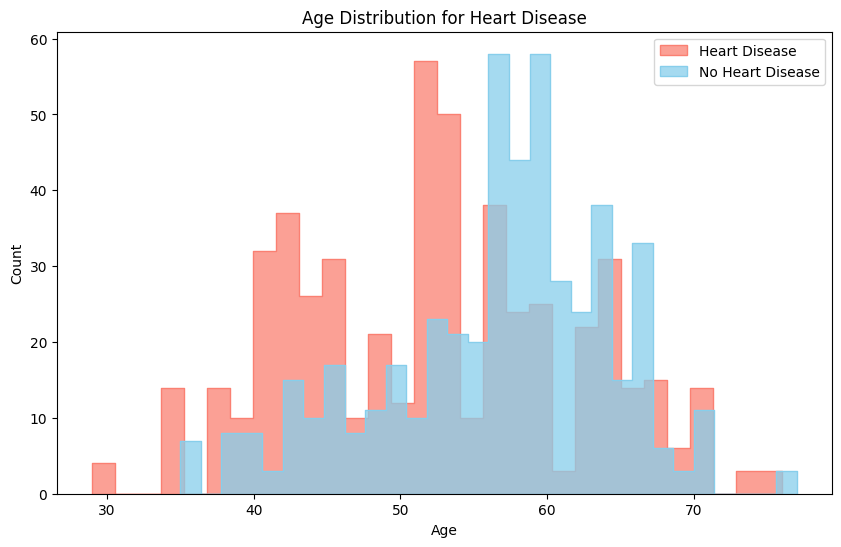

In [51]:
plt.figure(figsize=(10, 6))
sns.histplot(healthcare_data[healthcare_data['target'] == 1]['age'], bins=30, color='salmon', element='step' ,label='Heart Disease')
sns.histplot(healthcare_data[healthcare_data['target'] == 0]['age'], bins=30, color='skyblue', element='step' , label='No Heart Disease')
plt.title("Age Distribution for Heart Disease")
plt.xlabel("Age")
plt.ylabel("Count")
plt.legend()
plt.show()

The histplot displays the distribution for the ages of both groups(Heart Disease and No Heart Disease). We learn that: 

- Patients as young as 30 years old in age have been diagnosed with heart disease.
- The majority of patients that have heart disease fall within the age group of approximately 50-53 years of age. It can be interesting to further evaluate age as a factor in the presence of heart disease. 
- The majority of patients who have been diagnosed with "No Heart Disease" fall within the age group of approximately 57-60 years of age.
- We observe a significant overlap in age ranges between the two groups. This indicates that some individuals with heart disease and some without heart disease have similar ages. For example, the overlap between ages 50-60 where both groups are represented in higher proportions. This discourages our previous idea of age being a relevant factor in heart disease.
- Interestingly, the shape of the distribution with heart disease is slightly skewed towards comparatively younger/middle-aged groups. The shape of the distribution with no heart disease is slightly skewed towards older age groups, indicating that heart disease in this dataset is more prevalent in the younger/middle-aged groups.

#### Correlation Heatmap

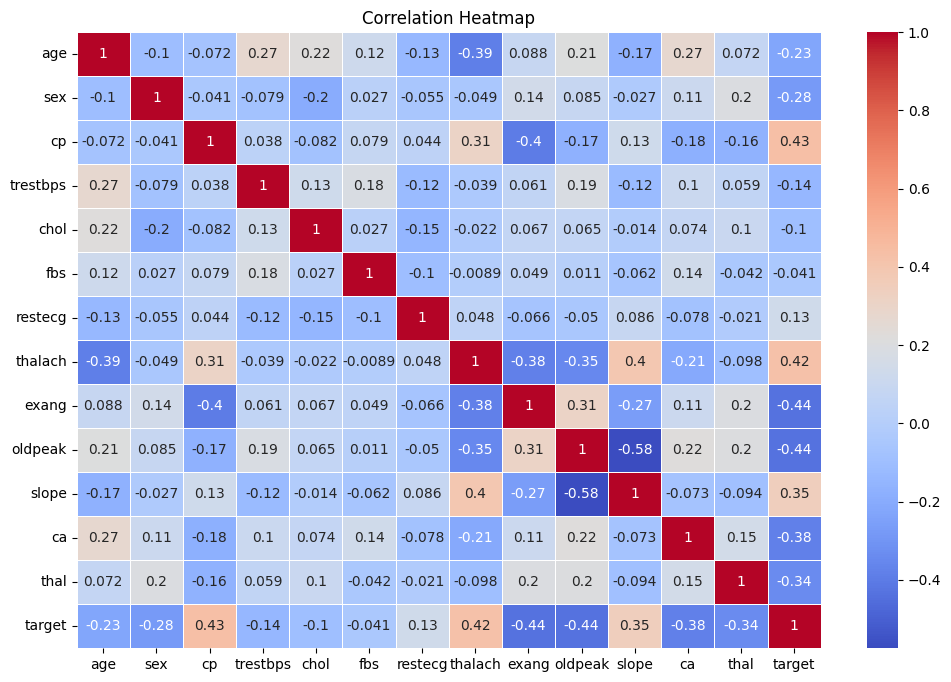

In [42]:
correlation_matrix = healthcare_data.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

The correlation heatmap can help us understand the relationships between different variables in the dataset. In a correlation heatmap, each cell represents the correlation coefficient between two variables. The color scale represents blue for negative correlations to red for positive correlations.

- We observe that chest pain and the target variable have a positive correlation. This means that as the chest pain increases in patients, the likelihood of having a heart disease also increases.
- We observe that age and thalac are negatively correlated. This means that older the patient, lower is their heart rate.

Analysts with domain-specific expertise, such as healthcare can leverage the heatmap for an in-depth understanding of specific cells, for example (cholesterol and blood pressure) and the risk of a heart condition based on this. 

### Machine Learning Model:

In [66]:
# Split the dataset into features and target
X = healthcare_data.drop('target', axis=1)  
y = healthcare_data['target'] 

- X contains the feature(s) that we are using for analysis
- y contains the label that we will analyze

In [58]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

- We are training on 80% of the dataset which will be stored in X-train and y_train)
- We will use 20% of the unseen data to test our model. This data is stored in X-test and y_test

In [61]:
# Create a Logistic Regression model
model = LogisticRegression(max_iter=1000)

# Train the model on the training data
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

- 'model = LogisticRegression()' creates an instance of a logistic regression model. Logistic regression is a type of supervised machine learning algorithm used for binary classification problems, where you want to predict one of two possible classes (e.g., yes/no, true/false, 1/0).
- 'model.fit(X_train, y_train)' trains the logistic regression model using the training data. In this case, X_train represents the feature matrix (independent variables), and y_train represents the target variable (label). The fit method adjusts the model's parameters to make predictions based on the provided training data.

In [65]:
# Make predictions on the testing data
y_pred = model.predict(X_test)


Model Accuracy: 79.51%
Precision: 0.76
Recall: 0.87
F1-Score: 0.81


- 'y_pred = model.predict(X_test)' makes predictions on a separate dataset, which is the testing set. X_test is the feature matrix, and y_pred is a variable that stores the predicted labels for the testing data. The logistic regression model uses the learned parameters to make predictions on new, unseen data.

### Results:
Report the model's 

In [67]:
# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("\nModel Accuracy: {:.2f}%".format(accuracy * 100))
print("Precision: {:.2f}".format(precision))
print("Recall: {:.2f}".format(recall))
print("F1-Score: {:.2f}".format(f1))


Model Accuracy: 79.51%
Precision: 0.76
Recall: 0.87
F1-Score: 0.81


- Model Accuracy is reported as 79.5%. This means that the model correctly predicted 79.5% of the instances in the dataset. 
- A precision of 0.76 means that 76% of the predictions the model made as positive were correct. 
- The recall score of 0.87 suggests that the model correctly identified 87% of all actual positive instances.
- An F1 score of 0.81 indicates that the model is effective at making positive predictions while also correctly identifying a substantial proportion of actual positive instances.

### Summary 

In this case study Case Study 2: Healthcare Analytics, we delve into the approach to using data analytics for accurately classifying patients with heart disease. The key steps and components of their strategy are as follows:

- **Data collection**: We begin by gathering healthcare data, that includes 13 attributes, and the target is the class variable affected by other columns.

- **Data exploration and preprocessing**: To ensure data accuracy and consistency, we checked for missing values.  Also, we tried to explore the features, of the distribution of data, and leveraged data visualization to uncover patterns and anomalies that could serve as potential indicators of a heart disease.

- **Machine learning model development**: Our Logistic regression model, that trained on historical data to make them proficient in learning from past patient records and distinguishing them from healthy patients.

- **Results and business impact**: The results of this approach are impressive. The model is effective at making positive predictions while also correctly identifying a substantial proportion of actual positive instances. 

In conclusion, this case study serves as an inspiring example of how data analytics can be leveraged effectively for the early detection of heart disease. It underscores the importance of data in safeguarding people's health and encourages others to explore the potential of data analytics in their endeavors.